In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon
import pingouin as pg

from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

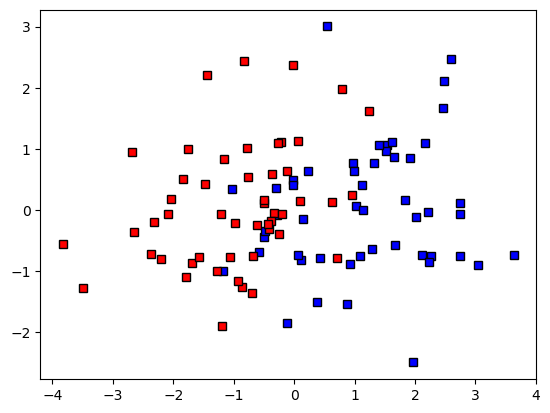

In [3]:
nPerClust = 50

A = [1, 0]
B = [-1, 0]

a = [A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust)]
b = [B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust)]

data = np.transpose(np.concatenate((a,b), axis=1))
grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))


groupcolors = 'br'

fig,ax = plt.subplots(1)
ax.plot(data[grouplabels==0,0],data[grouplabels==0,1],'ks',markerfacecolor=groupcolors[0])
ax.plot(data[grouplabels==1,0],data[grouplabels==1,1],'ks',markerfacecolor=groupcolors[1])

plt.show()

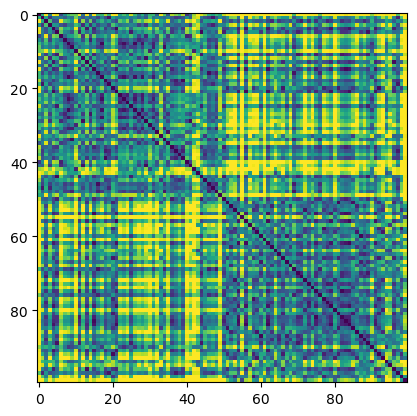

In [6]:
distmat = np.zeros((nPerClust*2,nPerClust*2))

for i in range(nPerClust*2):
    for j in range(nPerClust*2):
        distmat[i,j] = np.sqrt((data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2)
        
plt.imshow(distmat,vmax=4)
plt.show()

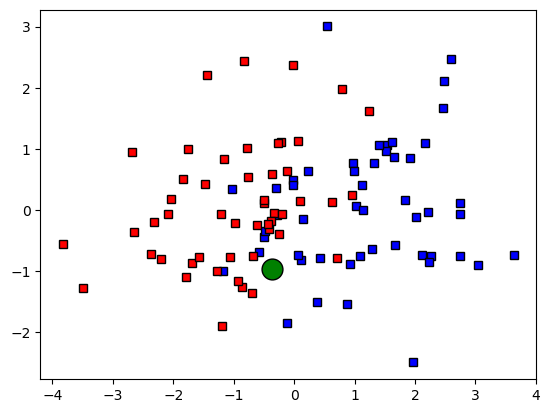

In [10]:
newpoint = 2*np.random.rand(2)-1

ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
fig

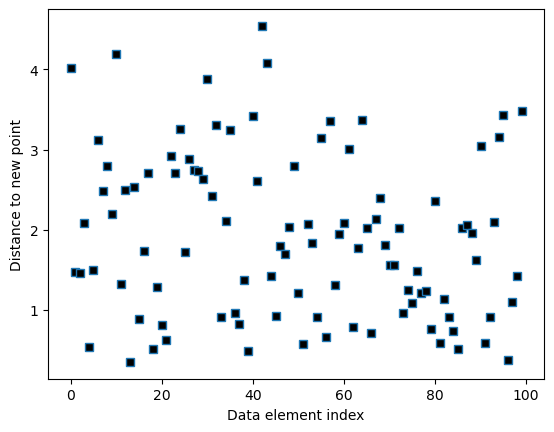

In [13]:
# compute distance vector
distvec = np.zeros(nPerClust*2)

for i in range(nPerClust*2):
    distvec[i] = np.sqrt( (data[i,0]-newpoint[0])**2 + (data[i,1]-newpoint[1])**2 )
    

# show the distances
plt.plot(distvec,'s',markerfacecolor='k')
plt.xlabel('Data element index')
plt.ylabel('Distance to new point')
plt.show()

[0. 1. 0.]
New data belong to group 0


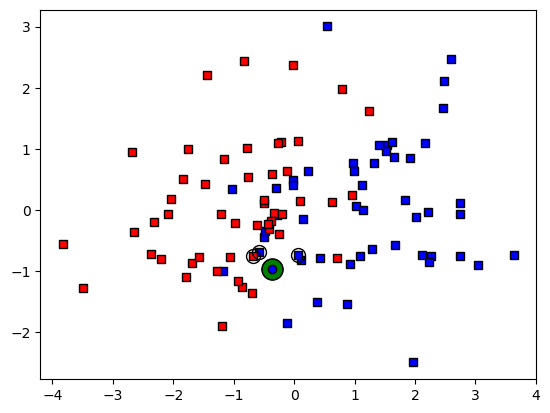

In [14]:
k = 3

# sort the distances
sortidx = np.argsort(distvec)

# find the group assignment of the nearest neighbors
print(grouplabels[sortidx[:k]])
whichgroup = int( np.median(grouplabels[sortidx[:k]]) )
print('New data belong to group ' + str(whichgroup))

# and re-plot
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor=groupcolors[whichgroup])
ax.plot(data[sortidx[:k],0],data[sortidx[:k],1],'ko',markersize=10,fillstyle='none')
fig